In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking-small.csv")
parkingdata.shape

(999, 13)

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,Victoria Market,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,24/08/2012 11:34:36 AM,24/08/2012 12:49:09 PM,4473,LZ 15M M-SAT 7:30-19:30,1,1346,3770
1,Courtney,PEEL STREET,O'CONNELL STREET,QUEENSBERRY STREET,2,5398E,17/03/2012 01:07:59 PM,17/03/2012 01:10:06 PM,127,1/2P A RPE M-SUN 7:30-23:00,0,1101,3472
2,Victoria Market,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6624,17/02/2012 01:54:34 PM,17/02/2012 02:20:17 PM,1543,2P MTR M-SAT 7:30-20:30,0,681,2805
3,Chinatown,LONSDALE STREET,SWANSTON STREET,RUSSELL STREET,3,2888N,27/11/2011 03:03:19 PM,27/11/2011 04:02:41 PM,3562,1P SUN 7:30-18:30,0,894,1770
4,Southbank,GRANT STREET,WELLS STREET,ST KILDA ROAD,3,9870N,21/04/2012 03:08:32 PM,21/04/2012 05:06:00 PM,7048,2P TKT A M-SAT 7:30-18:30,0,728,4584


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
994,Princes Theatre,SPRING STREET,LONSDALE STREET,Lt BOURKE STREET,5,65W,27/08/2012 05:42:47 PM,27/08/2012 05:45:01 PM,134,LZ 15M M-SUN 7:30-19:30,0,1288,6986
995,Hardware,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,1,C2912,04/04/2012 01:52:51 PM,04/04/2012 02:22:32 PM,1781,1P MTR M-SAT 7:30-19:30,0,894,1941
996,Magistrates,LA TROBE STREET,KING STREET,WILLIAM STREET,4,3891S,14/09/2012 04:59:28 PM,14/09/2012 05:03:19 PM,231,2P TKT A M-SAT 7:30-20:30,0,856,2157
997,Regency,RUSSELL STREET,LA TROBE STREET,Lt LONSDALE STREET,5,899W,02/11/2011 05:40:34 PM,02/11/2011 08:30:00 PM,10166,3P MTR M-SAT 7:30-20:30,0,1221,468
998,Magistrates,SPENCER STREET,Lt LONSDALE STREET,LONSDALE STREET,5,1555W,22/05/2012 01:24:35 PM,22/05/2012 02:14:08 PM,2973,2P TKT A M-F 9:30-16:00,0,1285,951


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        107
Regency             75
Titles              69
Princes Theatre     67
The Mac             66
Victoria Market     63
Southbank           58
Hyatt               50
Chinatown           49
Hardware            47
Spencer             42
Rialto              39
Courtney            39
County              38
City Square         36
Magistrates         36
RACV                34
Banks               32
Supreme             21
Jolimont            20
Tavistock            7
Docklands            3
West Melbourne       1
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,24/08/2012 11:34:36 AM,24/08/2012 12:49:09 PM,4473,LZ 15M M-SAT 7:30-19:30,1,1346,3770
1,COURTNEY,PEEL STREET,O'CONNELL STREET,QUEENSBERRY STREET,2,5398E,17/03/2012 01:07:59 PM,17/03/2012 01:10:06 PM,127,1/2P A RPE M-SUN 7:30-23:00,0,1101,3472
2,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6624,17/02/2012 01:54:34 PM,17/02/2012 02:20:17 PM,1543,2P MTR M-SAT 7:30-20:30,0,681,2805
3,CHINATOWN,LONSDALE STREET,SWANSTON STREET,RUSSELL STREET,3,2888N,27/11/2011 03:03:19 PM,27/11/2011 04:02:41 PM,3562,1P SUN 7:30-18:30,0,894,1770
4,SOUTHBANK,GRANT STREET,WELLS STREET,ST KILDA ROAD,3,9870N,21/04/2012 03:08:32 PM,21/04/2012 05:06:00 PM,7048,2P TKT A M-SAT 7:30-18:30,0,728,4584


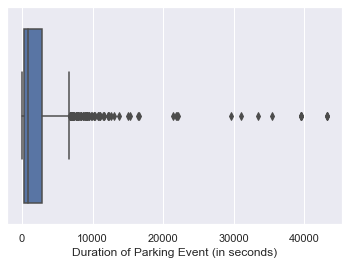

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])


In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             97
QUEEN STREET                73
LA TROBE STREET             62
RUSSELL STREET              58
COLLINS STREET              52
FRANKLIN STREET             52
BOURKE STREET               47
ELIZABETH STREET            47
EXHIBITION STREET           47
SPRING STREET               41
LT LONSDALE STREET          37
LT COLLINS STREET           29
ERROL STREET                24
WILLIAM STREET              21
FLINDERS LANE               20
LT BOURKE STREET            18
KING STREET                 18
QUEENSBERRY STREET          17
THERRY STREET               17
SPENCER STREET              15
COVENTRY STREET             14
A'BECKETT STREET            14
VICTORIA STREET             13
O'CONNELL STREET            11
FLINDERS STREET             11
CAPEL STREET                 9
SOUTHBANK BOULEVARD          8
ALBERT STREET                7
COBDEN STREET                7
WALSH STREET                 7
DORCAS STREET                7
KAVANAGH STREET              6
GRANT ST

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

QUEEN STREET           103
KING STREET             92
WILLIAM STREET          65
QUEENSBERRY STREET      62
RUSSELL STREET          57
LT LONSDALE STREET      53
SPENCER STREET          53
SWANSTON STREET         45
LONSDALE STREET         42
EXHIBITION STREET       36
LT COLLINS STREET       33
VICTORIA STREET         29
LT BOURKE STREET        28
BOURKE STREET           23
LA TROBE STREET         22
ELIZABETH STREET        22
COLLINS STREET          21
FLINDERS LANE           19
A'BECKETT STREET        18
WILLAM STREET           13
ERROL STREET            13
FRANKLIN STREET         12
WELLS STREET            11
FLINDERS STREET         10
O'CONNELL STREET         9
COBDEN STREET            8
DODDS STREET             8
HOWARD STREET            7
STURT STREET             7
THERRY STREET            6
VICTORIA PARADE          6
SOUTHBANK BOULEVARD      6
BALSTON STREET           6
KINGS WAY                5
PEEL STREET              5
ALBERT STREET            5
CITY ROAD                5
S

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

ELIZABETH STREET      104
VICTORIA STREET        86
WILLIAM STREET         79
QUEEN STREET           78
EXHIBITION STREET      56
LONSDALE STREET        54
KING STREET            53
LT BOURKE STREET       42
SPRING STREET          36
RUSSELL STREET         35
COLLINS STREET         33
FLINDERS LANE          31
LA TROBE STREET        30
BOURKE STREET          28
LT LONSDALE STREET     27
LT COLLINS STREET      23
SWANSTON STREET        22
FLINDERS STREET        19
LEVESON STREET         13
DODDS STREET           13
ST KILDA ROAD          11
WALSH STREET           10
KAVANAGH STREET         8
HAWKE STREET            8
QUEENSBERRY STREET      8
MILTON STREET           7
A'BECKETT STREET        7
POWER STREET            7
FRANKLIN STREET         6
LANSDOWNE STREET        6
THERRY STREET           6
CAPEL STREET            6
MILES STREET            5
WELLS STREET            5
CATHEDRAL PLACE         5
DORCAS STREET           3
STURT STREET            3
SPENCER STREET          3
DUDLEY STREE

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,VICTORIA MARKET,THERRY STREET,QUEEN STREET,ELIZABETH STREET,4,7021S,2012-08-24 11:34:36,2012-08-24 12:49:09,4473,LZ 15M M-SAT 7:30-19:30,1,1346,3770
1,COURTNEY,PEEL STREET,O'CONNELL STREET,QUEENSBERRY STREET,2,5398E,2012-03-17 13:07:59,2012-03-17 13:10:06,127,1/2P A RPE M-SUN 7:30-23:00,0,1101,3472
2,VICTORIA MARKET,FRANKLIN STREET,QUEEN STREET,ELIZABETH STREET,1,C6624,2012-02-17 13:54:34,2012-02-17 14:20:17,1543,2P MTR M-SAT 7:30-20:30,0,681,2805
3,CHINATOWN,LONSDALE STREET,SWANSTON STREET,RUSSELL STREET,3,2888N,2011-11-27 15:03:19,2011-11-27 16:02:41,3562,1P SUN 7:30-18:30,0,894,1770
4,SOUTHBANK,GRANT STREET,WELLS STREET,ST KILDA ROAD,3,9870N,2012-04-21 15:08:32,2012-04-21 17:06:00,7048,2P TKT A M-SAT 7:30-18:30,0,728,4584


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
994,PRINCES THEATRE,SPRING STREET,LONSDALE STREET,LT BOURKE STREET,5,65W,2012-08-27 17:42:47,2012-08-27 17:45:01,134,LZ 15M M-SUN 7:30-19:30,0,1288,6986
995,HARDWARE,LONSDALE STREET,QUEEN STREET,ELIZABETH STREET,1,C2912,2012-04-04 13:52:51,2012-04-04 14:22:32,1781,1P MTR M-SAT 7:30-19:30,0,894,1941
996,MAGISTRATES,LA TROBE STREET,KING STREET,WILLIAM STREET,4,3891S,2012-09-14 16:59:28,2012-09-14 17:03:19,231,2P TKT A M-SAT 7:30-20:30,0,856,2157
997,REGENCY,RUSSELL STREET,LA TROBE STREET,LT LONSDALE STREET,5,899W,2011-02-11 17:40:34,2011-02-11 20:30:00,10166,3P MTR M-SAT 7:30-20:30,0,1221,468
998,MAGISTRATES,SPENCER STREET,LT LONSDALE STREET,LONSDALE STREET,5,1555W,2012-05-22 13:24:35,2012-05-22 14:14:08,2973,2P TKT A M-F 9:30-16:00,0,1285,951


### KNN Classification Model on Predicitive Analytics question 3

In [19]:
#Target field identification
target = parkingdata['Street Name']

unique_vals = target.unique()
target.replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

target.head(10)

0    0
1    1
2    2
3    3
4    4
5    5
6    2
7    6
8    7
9    8
Name: Street Name, dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Street Name', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Duration of Parking Event (in seconds)'] = parkingdata['Duration of Parking Event (in seconds)']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Duration of Parking Event (in seconds),Street ID,Device ID,Arrival Hour,Departure Hour
0,0,0,0,0,1,4,4473,1346,3770,11,12
1,1,1,1,1,0,2,127,1101,3472,13,13
2,0,0,0,2,0,1,1543,681,2805,13,14
3,2,2,2,3,0,3,3562,894,1770,15,16
4,3,3,3,4,0,3,7048,728,4584,15,17
5,4,4,4,5,0,2,1900,1171,688,9,10
6,0,0,0,2,0,1,173,681,2804,19,19
7,5,5,5,6,0,3,674,856,1520,14,14
8,6,2,2,7,1,3,3597,670,1123,18,19
9,7,6,6,8,0,1,1994,647,258,14,15


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
params_KNN = {'n_neighbors': list(range(1, 10)), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': list(range(10, 50, 5)),
              'p': [1, 2, 5]
             }

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 2, 
                                    n_repeats = 1, 
                                    random_state = 4)

gs_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                      param_grid = params_KNN, 
                      cv = cv_method,
                      verbose = 1,
                      scoring = 'accuracy', 
                      return_train_score = True)

In [23]:
#Fit the model with the dataset
bestModel = gs_KNN.fit(features, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


C:\Users\drago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3456 out of 3456 | elapsed:  6.7min finished


In [24]:
#Find the best values for the  parameters of the model (Standard output)
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_n = bestModel.best_estimator_.get_params()['n_neighbors']
best_w = bestModel.best_estimator_.get_params()['weights']
best_a =  bestModel.best_estimator_.get_params()['algorithm']
best_l =  bestModel.best_estimator_.get_params()['leaf_size']
best_p =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n)
print('Best weights:', best_w)
print('Best algorithm:', best_a)
print('Best leaf_size:', best_l)
print('Best p:', best_p)

Best n_neighbors: 1
Best weights: uniform
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.591595
1,auto,10,1,1,distance,0.591595
2,auto,10,1,2,uniform,0.526541
3,auto,10,1,2,distance,0.526541
4,auto,10,1,5,uniform,0.498511
5,auto,10,1,5,distance,0.498511
6,auto,10,2,1,uniform,0.538551
7,auto,10,2,1,distance,0.591595
8,auto,10,2,2,uniform,0.469479
9,auto,10,2,2,distance,0.526541


In [27]:
#Define model with the optimal parameter values
knn = metric = KNeighborsClassifier(n_neighbors = best_n, 
                               weights = best_w, 
                               algorithm = best_a, 
                               leaf_size = best_l, 
                               p = best_p)

In [28]:
# Hill climbing w/ KNN
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = knn.fit(x_train, y_train)
    cur_Score = knn.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.21
Score with 2 selected features: 0.485
Score with 3 selected features: 0.505
Score with 4 selected features: 0.525
Score with 5 selected features: 0.64
Score with 6 selected features: 0.895
Score with 7 selected features: 0.9

Indexs of the desired features
[2, 3, 4, 1, 0, 7, 5]


In [29]:
#Create new dataframe from hill climbing output
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 2,Sign,In Violation?,Between Street 1,Area Name,Street ID,Side Of Street
0,0,0,1,0,0,1346,4
1,1,1,0,1,1,1101,2
2,0,2,0,0,0,681,1
3,2,3,0,2,2,894,3
4,3,4,0,3,3,728,3
5,4,5,0,4,4,1171,2
6,0,2,0,0,0,681,1
7,5,6,0,5,5,856,3
8,2,7,1,2,6,670,3
9,6,8,0,6,7,647,1


In [30]:
#Fit the model with the dataset (New Hill Climbing Features)
bestModel = gs_KNN.fit(features_hc, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


C:\Users\drago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3456 out of 3456 | elapsed:  6.7min finished


In [31]:
#Find the best values for the  parameters of the model (Standard output) AFTER HILL CLIMBING
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [32]:
#Find the best values for the  parameters of the model (Formatted output) AFTER HILL CLIMBING
best_n_hc = bestModel.best_estimator_.get_params()['n_neighbors']
best_w_hc = bestModel.best_estimator_.get_params()['weights']
best_a_hc =  bestModel.best_estimator_.get_params()['algorithm']
best_l_hc =  bestModel.best_estimator_.get_params()['leaf_size']
best_p_hc =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n_hc)
print('Best weights:', best_w_hc)
print('Best algorithm:', best_a_hc)
print('Best leaf_size:', best_l_hc)
print('Best p:', best_p_hc)

Best n_neighbors: 1
Best weights: uniform
Best algorithm: auto
Best leaf_size: 20
Best p: 1


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset AFTER HILL CLIMBING
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.924926
1,auto,10,1,1,distance,0.924926
2,auto,10,1,2,uniform,0.904906
3,auto,10,1,2,distance,0.904906
4,auto,10,1,5,uniform,0.898906
5,auto,10,1,5,distance,0.898906
6,auto,10,2,1,uniform,0.878880
7,auto,10,2,1,distance,0.923926
8,auto,10,2,2,uniform,0.872862
9,auto,10,2,2,distance,0.904906


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
knn = metric = KNeighborsClassifier(n_neighbors = best_n_hc, 
                               weights = best_w_hc, 
                               algorithm = best_a_hc, 
                               leaf_size = best_l_hc, 
                               p = best_p_hc)

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
knn.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = knn.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(knn.score(x_test, y_test)))

Confusion Matrix
[[ 9  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0 29 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  0]]

[Train/test split] score: 0.93000


In [ ]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    knn.fit(x_train, y_train)
    kFoldTotal += knn.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

[fold 0] score: 0.95000
[fold 1] score: 0.95500